# 1. Cargar Dataset - Comprendiendo el negocio

In [5]:
import pandas as pd
import numpy as np
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel("proyectosdata.xls")

In [6]:
df.head()

cod_proyecto   cliente fecha_inicio  servicio  costoestimado tipocliente  \
0            22  cliente0   2016-07-17     movil          10500     publico   
1            43  cliente0   2016-08-07  software           5350     publico   
2            91  cliente0   2016-09-16  consulta           4730     publico   
3           135  cliente0   2016-10-30     movil           5400     publico   
4           137  cliente0   2016-11-01  software           1600     publico   

  fechaentrega  numhitos entregaestimprimer entregarealprimer   ...     \
0   2016-12-13         2         2016-08-16        2016-08-14   ...      
1   2017-01-03         2         2016-09-06        2016-09-09   ...      
2   2017-02-12         2         2016-10-16        2016-10-24   ...      
3   2017-03-28         2         2016-11-29        2016-12-04   ...      
4   2017-03-30         2         2016-12-01        2016-12-06   ...      

   pagorealprimer  demorapagohito1 entregaestimsegundo entregarealsegundo  \
0      2016-09-23                8          2016-08-16         2016-08-22   
1      2016-10-11                5          2016-09-06         2016-09-09   
2      2016-11-26               11          2016-10-16         2016-10-25   
3      2017-01-03                5          2016-11-29         2016-12-07   
4      2017-01-15               15          2016-12-01         2016-12-09   

   demoraentregahito2 porcsegundohito pagoestimsegundo  pagorealsegundo  \
0                   6             0.3       2016-09-15       2016-09-28   
1                   3             0.6       2016-10-06       2016-10-15   
2                   9             0.7       2016-11-15       2016-11-24   
3                   8             0.6       2016-12-29       2017-01-12   
4                   8             0.5       2016-12-31       2017-01-06   

   demorapagohito2 recursos  
0               13        4  
1                9        4  
2                9        5  
3               14        3  
4                6        3  

[5 rows x 23 columns]

# 2. Interpretación de Datos

In [8]:
df.dtypes

cod_proyecto                    int64
cliente                        object
fecha_inicio           datetime64[ns]
servicio                       object
costoestimado                   int64
tipocliente                    object
fechaentrega           datetime64[ns]
numhitos                        int64
entregaestimprimer     datetime64[ns]
entregarealprimer      datetime64[ns]
demoraentregahito1              int64
porcprimerhito                float64
pagoestimprimer        datetime64[ns]
pagorealprimer         datetime64[ns]
demorapagohito1                 int64
entregaestimsegundo    datetime64[ns]
entregarealsegundo     datetime64[ns]
demoraentregahito2              int64
porcsegundohito               float64
pagoestimsegundo       datetime64[ns]
pagorealsegundo        datetime64[ns]
demorapagohito2                 int64
recursos                        int64
dtype: object

In [9]:
df['cliente'] = df['cliente'].astype('category')
df['tipocliente'] = df['tipocliente'].astype('category')
df['servicio'] = df['servicio'].astype('category')
df.dtypes

cod_proyecto                    int64
cliente                      category
fecha_inicio           datetime64[ns]
servicio                     category
costoestimado                   int64
tipocliente                  category
fechaentrega           datetime64[ns]
numhitos                        int64
entregaestimprimer     datetime64[ns]
entregarealprimer      datetime64[ns]
demoraentregahito1              int64
porcprimerhito                float64
pagoestimprimer        datetime64[ns]
pagorealprimer         datetime64[ns]
demorapagohito1                 int64
entregaestimsegundo    datetime64[ns]
entregarealsegundo     datetime64[ns]
demoraentregahito2              int64
porcsegundohito               float64
pagoestimsegundo       datetime64[ns]
pagorealsegundo        datetime64[ns]
demorapagohito2                 int64
recursos                        int64
dtype: object

# 3. Preparación de Datos

In [10]:
df['clientecod'] = df['cliente'].cat.codes
df['tipo_cliente_cod'] = df['tipocliente'].cat.codes
df['tipo_servicio'] = df['servicio'].cat.codes
df.head()

cod_proyecto   cliente fecha_inicio  servicio  costoestimado tipocliente  \
0            22  cliente0   2016-07-17     movil          10500     publico   
1            43  cliente0   2016-08-07  software           5350     publico   
2            91  cliente0   2016-09-16  consulta           4730     publico   
3           135  cliente0   2016-10-30     movil           5400     publico   
4           137  cliente0   2016-11-01  software           1600     publico   

  fechaentrega  numhitos entregaestimprimer entregarealprimer      ...       \
0   2016-12-13         2         2016-08-16        2016-08-14      ...        
1   2017-01-03         2         2016-09-06        2016-09-09      ...        
2   2017-02-12         2         2016-10-16        2016-10-24      ...        
3   2017-03-28         2         2016-11-29        2016-12-04      ...        
4   2017-03-30         2         2016-12-01        2016-12-06      ...        

   entregarealsegundo  demoraentregahito2 porcsegundohito pagoestimsegundo  \
0          2016-08-22                   6             0.3       2016-09-15   
1          2016-09-09                   3             0.6       2016-10-06   
2          2016-10-25                   9             0.7       2016-11-15   
3          2016-12-07                   8             0.6       2016-12-29   
4          2016-12-09                   8             0.5       2016-12-31   

   pagorealsegundo demorapagohito2 recursos  clientecod  tipo_cliente_cod  \
0       2016-09-28              13        4           0                 1   
1       2016-10-15               9        4           0                 1   
2       2016-11-24               9        5           0                 1   
3       2017-01-12              14        3           0                 1   
4       2017-01-06               6        3           0                 1   

  tipo_servicio  
0             1  
1             2  
2             0  
3             1  
4             2  

[5 rows x 26 columns]

In [11]:
del df['cliente']
del df['tipocliente']
del df['servicio']
df.head()

cod_proyecto fecha_inicio  costoestimado fechaentrega  numhitos  \
0            22   2016-07-17          10500   2016-12-13         2   
1            43   2016-08-07           5350   2017-01-03         2   
2            91   2016-09-16           4730   2017-02-12         2   
3           135   2016-10-30           5400   2017-03-28         2   
4           137   2016-11-01           1600   2017-03-30         2   

  entregaestimprimer entregarealprimer  demoraentregahito1  porcprimerhito  \
0         2016-08-16        2016-08-14                   0             0.7   
1         2016-09-06        2016-09-09                   3             0.4   
2         2016-10-16        2016-10-24                   8             0.3   
3         2016-11-29        2016-12-04                   5             0.4   
4         2016-12-01        2016-12-06                   5             0.5   

  pagoestimprimer      ...       entregarealsegundo  demoraentregahito2  \
0      2016-09-15      ...               2016-08-22                   6   
1      2016-10-06      ...               2016-09-09                   3   
2      2016-11-15      ...               2016-10-25                   9   
3      2016-12-29      ...               2016-12-07                   8   
4      2016-12-31      ...               2016-12-09                   8   

  porcsegundohito pagoestimsegundo  pagorealsegundo  demorapagohito2 recursos  \
0             0.3       2016-09-15       2016-09-28               13        4   
1             0.6       2016-10-06       2016-10-15                9        4   
2             0.7       2016-11-15       2016-11-24                9        5   
3             0.6       2016-12-29       2017-01-12               14        3   
4             0.5       2016-12-31       2017-01-06                6        3   

  clientecod  tipo_cliente_cod  tipo_servicio  
0          0                 1              1  
1          0                 1              2  
2          0                 1              0  
3          0                 1              1  
4          0                 1              2  

[5 rows x 23 columns]

In [12]:
df['costoestimado'] = df['costoestimado']/1.0
#print(df.describe())
df.head()

cod_proyecto fecha_inicio  costoestimado fechaentrega  numhitos  \
0            22   2016-07-17        10500.0   2016-12-13         2   
1            43   2016-08-07         5350.0   2017-01-03         2   
2            91   2016-09-16         4730.0   2017-02-12         2   
3           135   2016-10-30         5400.0   2017-03-28         2   
4           137   2016-11-01         1600.0   2017-03-30         2   

  entregaestimprimer entregarealprimer  demoraentregahito1  porcprimerhito  \
0         2016-08-16        2016-08-14                   0             0.7   
1         2016-09-06        2016-09-09                   3             0.4   
2         2016-10-16        2016-10-24                   8             0.3   
3         2016-11-29        2016-12-04                   5             0.4   
4         2016-12-01        2016-12-06                   5             0.5   

  pagoestimprimer      ...       entregarealsegundo  demoraentregahito2  \
0      2016-09-15      ...               2016-08-22                   6   
1      2016-10-06      ...               2016-09-09                   3   
2      2016-11-15      ...               2016-10-25                   9   
3      2016-12-29      ...               2016-12-07                   8   
4      2016-12-31      ...               2016-12-09                   8   

  porcsegundohito pagoestimsegundo  pagorealsegundo  demorapagohito2 recursos  \
0             0.3       2016-09-15       2016-09-28               13        4   
1             0.6       2016-10-06       2016-10-15                9        4   
2             0.7       2016-11-15       2016-11-24                9        5   
3             0.6       2016-12-29       2017-01-12               14        3   
4             0.5       2016-12-31       2017-01-06                6        3   

  clientecod  tipo_cliente_cod  tipo_servicio  
0          0                 1              1  
1          0                 1              2  
2          0                 1              0  
3          0                 1              1  
4          0                 1              2  

[5 rows x 23 columns]

In [13]:
#busqueda de valores nulos
df.isnull().any()

cod_proyecto           False
fecha_inicio           False
costoestimado          False
fechaentrega           False
numhitos               False
entregaestimprimer     False
entregarealprimer      False
demoraentregahito1     False
porcprimerhito         False
pagoestimprimer        False
pagorealprimer         False
demorapagohito1        False
entregaestimsegundo    False
entregarealsegundo     False
demoraentregahito2     False
porcsegundohito        False
pagoestimsegundo       False
pagorealsegundo        False
demorapagohito2        False
recursos               False
clientecod             False
tipo_cliente_cod       False
tipo_servicio          False
dtype: bool

In [14]:
df.head()

cod_proyecto fecha_inicio  costoestimado fechaentrega  numhitos  \
0            22   2016-07-17        10500.0   2016-12-13         2   
1            43   2016-08-07         5350.0   2017-01-03         2   
2            91   2016-09-16         4730.0   2017-02-12         2   
3           135   2016-10-30         5400.0   2017-03-28         2   
4           137   2016-11-01         1600.0   2017-03-30         2   

  entregaestimprimer entregarealprimer  demoraentregahito1  porcprimerhito  \
0         2016-08-16        2016-08-14                   0             0.7   
1         2016-09-06        2016-09-09                   3             0.4   
2         2016-10-16        2016-10-24                   8             0.3   
3         2016-11-29        2016-12-04                   5             0.4   
4         2016-12-01        2016-12-06                   5             0.5   

  pagoestimprimer      ...       entregarealsegundo  demoraentregahito2  \
0      2016-09-15      ...               2016-08-22                   6   
1      2016-10-06      ...               2016-09-09                   3   
2      2016-11-15      ...               2016-10-25                   9   
3      2016-12-29      ...               2016-12-07                   8   
4      2016-12-31      ...               2016-12-09                   8   

  porcsegundohito pagoestimsegundo  pagorealsegundo  demorapagohito2 recursos  \
0             0.3       2016-09-15       2016-09-28               13        4   
1             0.6       2016-10-06       2016-10-15                9        4   
2             0.7       2016-11-15       2016-11-24                9        5   
3             0.6       2016-12-29       2017-01-12               14        3   
4             0.5       2016-12-31       2017-01-06                6        3   

  clientecod  tipo_cliente_cod  tipo_servicio  
0          0                 1              1  
1          0                 1              2  
2          0                 1              0  
3          0                 1              1  
4          0                 1              2  

[5 rows x 23 columns]

In [15]:
#del df['fecha_inicio']
del df['fechaentrega']
del df['entregaestimprimer']
del df['entregarealprimer']
del df['pagoestimprimer']
del df['pagorealprimer']
del df['entregaestimsegundo']
del df['entregarealsegundo']
del df['pagoestimsegundo']
del df['pagorealsegundo']

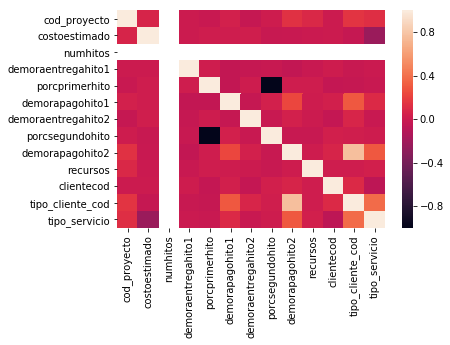

In [16]:
#Comprendiendo relación entre variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 4. Elaboración de Datos


In [ ]:
df['target'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)